In [ ]:
'''
Welcome to our Notebook!

This is for the Urban Air Quality Group

Group Members: Selma, Ethan, Sophiya
'''

In [ ]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [ ]:
# Read the CSV file
data = pd.read_csv('gbd.csv')

data.head()

Correlation Matrix:
                                      Deaths  Daily Mean PM2.5 Concentration  \
Deaths                          1.000000e+00                    1.692799e-17   
Daily Mean PM2.5 Concentration  1.692799e-17                    1.000000e+00   
Daily AQI Value                 1.220861e-17                    9.862226e-01   

                                Daily AQI Value  
Deaths                             1.220861e-17  
Daily Mean PM2.5 Concentration     9.862226e-01  
Daily AQI Value                    1.000000e+00  

Correlation between PM2.5 and Deaths:
Correlation Coefficient: -0.0000
P-value: 1.0000

Correlation between AQI and Deaths:
Correlation Coefficient: -0.0000
P-value: 1.0000


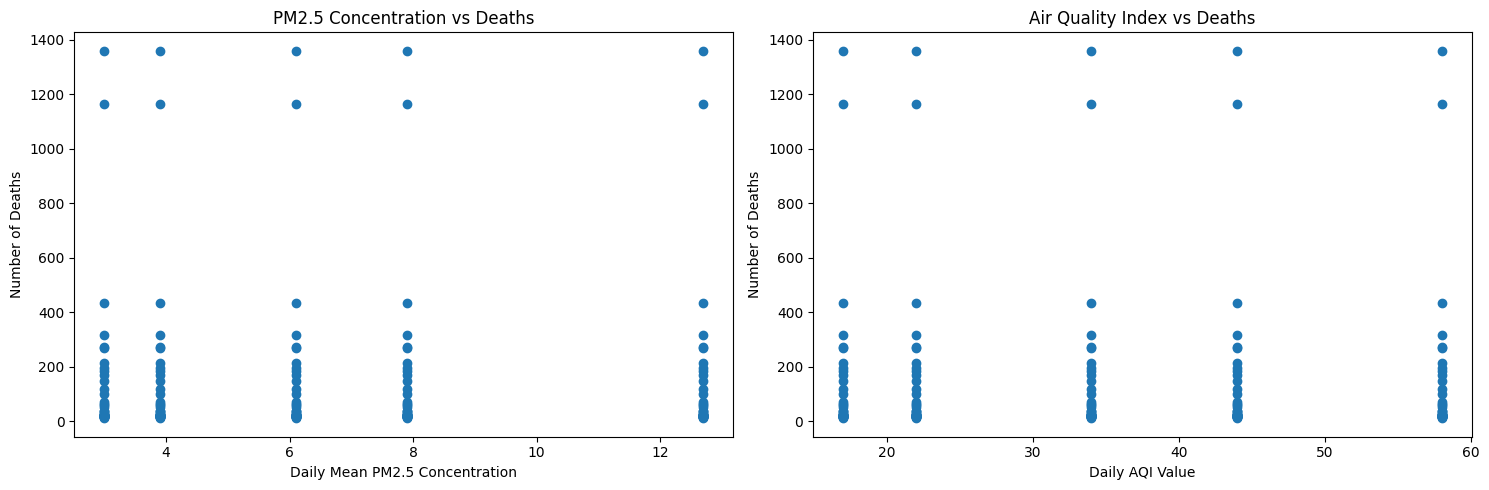


Death Aggregation by Cause:
                                                    Deaths  \
Cause of death                                               
J44.9 (Chronic obstructive pulmonary disease, u...    6795   
J18.9 (Pneumonia, unspecified)                        5820   
J69.0 (Pneumonitis due to food and vomit)             2170   
J44.0 (Chronic obstructive pulmonary disease wi...    1580   
J15.9 (Bacterial pneumonia, unspecified)              1360   
J18.1 (Lobar pneumonia, unspecified)                  1350   
J84.9 (Interstitial pulmonary disease, unspecif...    1070   
J84.1 (Other interstitial pulmonary diseases wi...     975   
J96.9 (Respiratory failure, unspecified)               915   
J96.0 (Acute respiratory failure)                      845   
J45.9 (Asthma, unspecified)                            745   
J44.1 (Chronic obstructive pulmonary disease wi...     585   
J43.9 (Emphysema, unspecified)                         505   
J96.1 (Chronic respiratory failure)      

In [ ]:
def load_and_preprocess_data(filepath):
    """
    Load the dataset and preprocess for analysis
    """
    # Read the CSV file
    df = pd.read_csv(filepath)
    
    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Group data by unique dates and causes of death
    grouped_df = df.groupby(['Date', 'Cause of death']).agg({
        'Deaths': 'sum',
        'Daily Mean PM2.5 Concentration': 'mean',
        'Daily AQI Value': 'mean'
    }).reset_index()
    
    return grouped_df

def analyze_correlation(df):
    """
    Perform correlation analysis between PM2.5, AQI, and Deaths
    """
    # Create correlation matrix
    correlation_matrix = df[['Deaths', 'Daily Mean PM2.5 Concentration', 'Daily AQI Value']].corr()
    
    # Perform statistical significance test
    pm25_death_corr, pm25_death_pvalue = stats.pearsonr(
        df['Daily Mean PM2.5 Concentration'], 
        df['Deaths']
    )
    
    aqi_death_corr, aqi_death_pvalue = stats.pearsonr(
        df['Daily AQI Value'], 
        df['Deaths']
    )
    
    print("Correlation Matrix:")
    print(correlation_matrix)
    
    print("\nCorrelation between PM2.5 and Deaths:")
    print(f"Correlation Coefficient: {pm25_death_corr:.4f}")
    print(f"P-value: {pm25_death_pvalue:.4f}")
    
    print("\nCorrelation between AQI and Deaths:")
    print(f"Correlation Coefficient: {aqi_death_corr:.4f}")
    print(f"P-value: {aqi_death_pvalue:.4f}")
    
    return correlation_matrix

def visualize_relationships(df):
    """
    Create visualizations to explore relationships
    """
    plt.figure(figsize=(15, 5))
    
    # Scatter plot: PM2.5 vs Deaths
    plt.subplot(1, 2, 1)
    plt.scatter(df['Daily Mean PM2.5 Concentration'], df['Deaths'])
    plt.title('PM2.5 Concentration vs Deaths')
    plt.xlabel('Daily Mean PM2.5 Concentration')
    plt.ylabel('Number of Deaths')
    
    # Scatter plot: AQI vs Deaths
    plt.subplot(1, 2, 2)
    plt.scatter(df['Daily AQI Value'], df['Deaths'])
    plt.title('Air Quality Index vs Deaths')
    plt.xlabel('Daily AQI Value')
    plt.ylabel('Number of Deaths')
    
    plt.tight_layout()
    plt.show()

def aggregate_deaths_by_cause(df):
    """
    Aggregate deaths by cause and air pollution metrics
    """
    cause_aggregation = df.groupby('Cause of death').agg({
        'Deaths': 'sum',
        'Daily Mean PM2.5 Concentration': 'mean',
        'Daily AQI Value': 'mean'
    }).sort_values('Deaths', ascending=False)
    
    print("\nDeath Aggregation by Cause:")
    print(cause_aggregation)
    
    return cause_aggregation

def main(filepath):
    # Load and preprocess data
    processed_df = load_and_preprocess_data(filepath)
    
    # Correlation Analysis
    correlation_results = analyze_correlation(processed_df)
    
    # Visualize Relationships
    visualize_relationships(processed_df)
    
    # Aggregate Deaths by Cause
    cause_death_summary = aggregate_deaths_by_cause(processed_df)

# Example usage
main('merged_dataset.csv')